## MRF Implementation

In [76]:
import numpy as np

def denoise_mrf(image: np.ndarray, pairwise_weight: int = 1, iterations: int = 5):
    rows, cols = image.shape

    def average() -> int:
        avg = 0
        for i in range(rows):
            for j in range(cols):
                avg += image[i][j]
        return avg/(rows*cols)

    def singleton(i: int, j: int, mu: int) -> int:
        return (image[i][j] - mu) ** 2
    
    def pairwise(i: int, j: int) -> int:
        pairwise = 0
        if(i != 0):
            pairwise += (image[i][j] - image[i - 1][j]) ** 2
        if(i != rows - 1):
            pairwise += (image[i][j] - image[i + 1][j]) ** 2
        if(j != 0):
            pairwise += (image[i][j] - image[i][j - 1]) ** 2
        if(j != cols - 1):
            pairwise += (image[i][j] - image[i][j + 1]) ** 2
        return pairwise

    def energy() -> int:
        E = 0
        singleton_potential = 0
        pairwise_potential = 0
        for i in range(rows):
            for j in range(cols):
                singleton_potential += singleton(i, j, average())
                pairwise_potential += pairwise_weight * pairwise(i, j)
        E = singleton_potential + pairwise_potential
        return E
    
    def partial_derivative(i: int, j: int, avg: int) -> int:
        pairwise = 0
        
        if(i != 0):
            pairwise += (image[i][j] - image[i - 1][j]) * 2
        if(i != rows - 1):
            pairwise += (image[i][j] - image[i + 1][j]) * 2
        if(j != 0):
            pairwise += (image[i][j] - image[i][j - 1]) * 2
        if(j != cols - 1):
            pairwise += (image[i][j] - image[i][j + 1]) * 2
        
        pairwise *= pairwise_weight
        singleton = 2 * (image[i][j] - avg)

        return singleton + pairwise
    
    def gradient_matrix(image: np.ndarray) -> np.ndarray:
        grad = np.zeros((rows, cols), dtype=int)
        avg = average()
        # print("Gradient Mat")
        for i in range(rows):
            for j in range(cols):
                grad[i][j] = partial_derivative(i, j, avg)
        return grad
        
    # energy_history = []
    def gradient_descent(image2: np.ndarray) -> np.ndarray:
        for i in range(iterations):
            # print("Iteration: ", i)
            # energy_history.append(energy())
            image1 = np.add(image2, gradient_matrix(image2))
            image2 = image1
            image = image2
        return image2

    return gradient_descent(image) #, energy_history)

## Loading the image

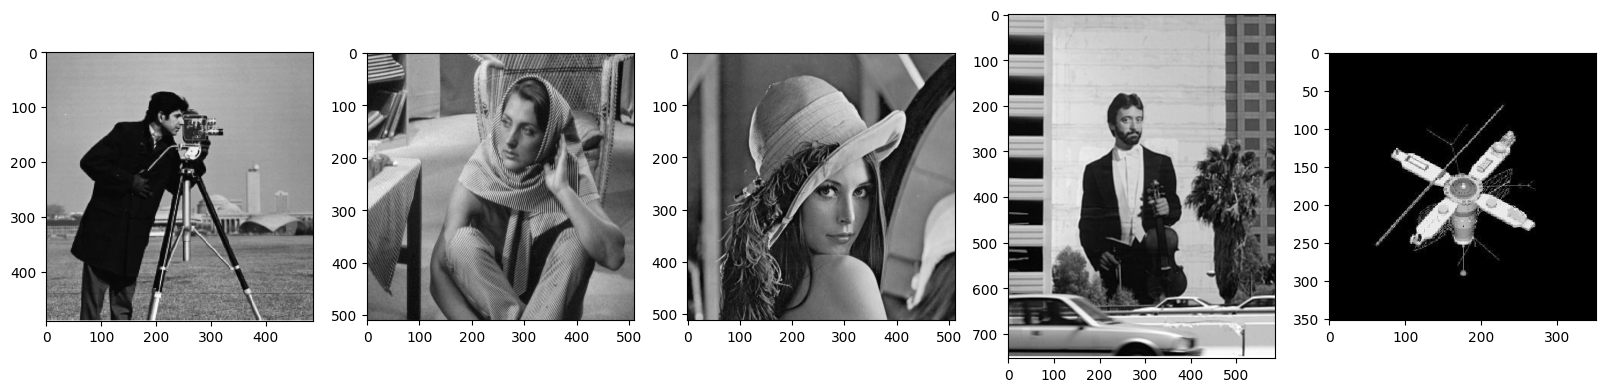

In [77]:
import cv2
import matplotlib.pyplot as plt

image_names = ['cameraman.png', 'barbara.jpg', 'lenna.jpg', 'violinist.png', 'satellite.jpg']
images = []
num = len(image_names)
for i in range(num):
    images.append(cv2.imread("../data/" + image_names[i], cv2.IMREAD_GRAYSCALE))

fig = plt.figure(figsize=(20, 5))
for i in range(num):
    fig.add_subplot(1, num, i + 1)
    plt.imshow(images[i], cmap='gray')

## Adding gaussian noise to image

In [78]:
import warnings
warnings.filterwarnings('ignore')

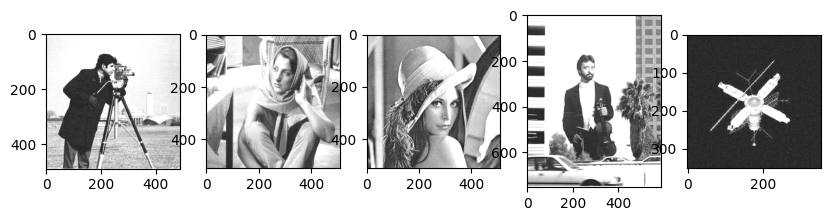

In [79]:
noisy_images = []
for i in range(num):
    img = images[i]
    (rows, cols) = img.shape
    gauss_noise=np.zeros((rows,cols),dtype=np.uint8)
    cv2.randn(gauss_noise,128,10)
    gauss_noise=(gauss_noise*0.7).astype(np.uint8)
    gn_img=cv2.add(img,gauss_noise)
    noisy_images.append(gn_img)

fig = plt.figure(figsize=(10, 5))
for i in range(num):
    fig.add_subplot(1, num, i + 1)
    plt.imshow(noisy_images[i], cmap='gray')

## Performing Denoising using MRF

In [80]:
denoised_images = []
for i in range(num):
    denoised = denoise_mrf(noisy_images[i], 0.03, 10)
    denoised_images.append(denoised)

## Output Image

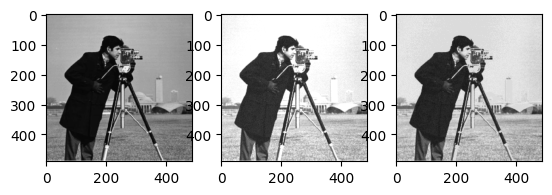

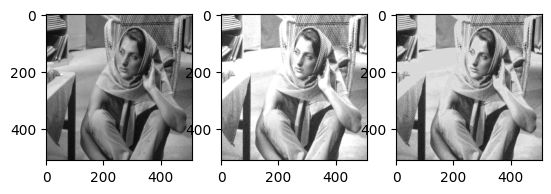

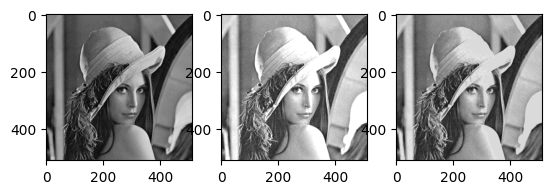

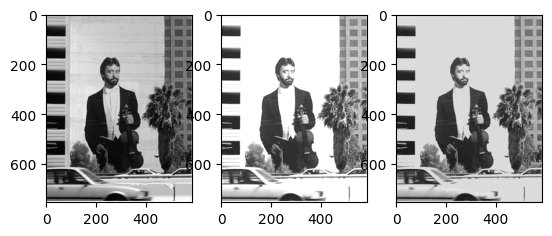

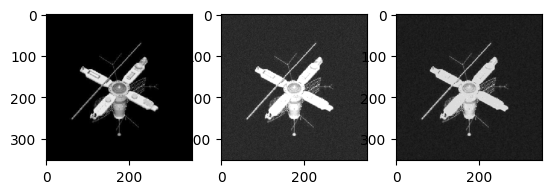

In [82]:
for i in range(num):
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(images[i], cmap='gray')
    fig.add_subplot(1, 3, 2)
    plt.imshow(noisy_images[i], cmap='gray')
    fig.add_subplot(1, 3, 3)
    plt.imshow(denoised_images[i], cmap='gray')